# Foundations of Data Analytics & AI: Assignment 1
## **Group 2 Members:**

1. Roshini .
2. Muhatasim Intisar
3. Avani Manda
4. Ishit Maheshbhai Patel
5. Siri Taraganahalli gowda

## 1. Introduction

This notebook presents an analysis of a gym memberships dataset using exploratory data analysis (EDA), statistical hypothesis testing, and linear regression techniques. The objective of the analysis is to formulate and investigate three research questions that examine different aspects of member behaviour and outcomes within the dataset.

Exploratory data analysis is used to understand the structure of the data, identify patterns, and highlight potential data quality issues. Where appropriate, statistical hypothesis testing is applied to assess whether observed relationships are statistically significant. In addition, linear if appropriate for a research question, linear regression modelling is used.

The findings and limitations to our approach are elaborated on in this notebook.

### ▶ Research Questions

The dataset contains information on gym members that can be broadly grouped into:
- **Demographic data** (e.g. age, gender)
- **Actionable behavioral data** (e.g. session length, water intake)
- **Descriptive behavioral data** (e.g. training frequency, experience level)
- **Descriptive workout data** (e.g. workout type)
- **Actionable workout outcomes** (e.g. calories burned per session)
- **Health-indicating data** (e.g. BMI, weight, height, body fat percentage)

Based on these categories, the following research questions were formulated to explore
different aspects of the data:

1. **Is there a statistically significant difference in daily water intake among beginner,
   intermediate, and expert gym members?**  
This question examines how a member’s long-term status (descriptive behavioral variable) relates to their session-to-session behavior (actionable behavioral variable). It is suitable for hypothesis testing using an ANOVA or for analysis via regression.

2. **Can a gym member’s body fat percentage be predicted using workout habits and demographic
   characteristics?**  
Body fat percentage is an important health indicator that often requires invasive or time-consuming measurements. By analyzing its relationship with other variables, we can estimate body fat percentage from readily available data. This question is suitable for analysis using linear regression.

3. **Is there a statistically significant difference in the average number of calories burned per
   session across different workout types?**  
This question investigates how a descriptive workout variable (workout type) influences an actionable workout outcome (calories burned). It can be addressed using hypothesis testing (ANOVA) or regression analysis.

### ▶ Justification

These research questions were selected because they:
- Reflect key variables present in the dataset  
- Cover descriptive, inferential, and predictive analyses  
- Are suitable for the applied methods of statistical hypothesis testing and regression analysis


## 2. Load Dataset and Initial Analysis

We import the libraries to be used for this assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SciPy
from scipy import stats
from scipy.stats import levene, shapiro, f_oneway

# Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Additional statistical library
import pingouin as pg

warnings.filterwarnings('ignore')

The dataset has been provided in a CSV file *GymMembers.csv*.   
We load it into a pandas DataFrame:

In [2]:
df = pd.read_csv("GymMembers.csv")

Going over the first 5 rows in the dataframe:

In [3]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


We can see that the dataset contains categorical, ordinal and continuous data:
1. Categorical: Gender, Workout type
2. Ordinal: Experience Level
3. Continous: The remainder of the variables are continuous

In [4]:
feature_names = df.columns
print(f"The dataset has {len(feature_names)} features. These are:")
for name in feature_names:
    print(f"{name}")

The dataset has 15 features. These are:
Age
Gender
Weight (kg)
Height (m)
Max_BPM
Avg_BPM
Resting_BPM
Session_Duration (hours)
Calories_Burned
Workout_Type
Fat_Percentage
Water_Intake (liters)
Workout_Frequency (days/week)
Experience_Level
BMI


We run info() on the datafrome to get the datatypes and find if we have any missing values that need to be handled via imputation or dropping

In [5]:
df.info()
print(f"We have {df.isna().any().sum()} missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

we run describe() on the continuous variables in the dataset to get summary statistics and confirm whether all the features (columns) have acceptable ranges

In [6]:
df_quant = df.drop(columns=['Gender','Workout_Type','Experience_Level'])
df_quant.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000


The features are within the acceptable range for these variables. So, we do not need to drop any columns or perform any manipulations

For our categorical and ordical data we retrieve the value counts.

In [7]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [8]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [9]:
df['Experience_Level'].value_counts()

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

Gender and Workout type category are fairly balanced and so do not require special consideration before performing tests. However, the *experience level* category has significant class imbalance and will need to be handled before any hypothesis testing.

## 3. Exploratory Data Analysis

We will perform an exploratory data analysis (EDA) to get a more in depth view of the data:
- We plot histograms of our target variables to understand central tendency and variability of the classes.
- we visualise boxplots of the categorical and ordical classes to confirm class imbalances.
- We create a correlation matrix to identify collinearity between continuous classes

###  ▶ Count Plots for Categorical/Ordinal Data

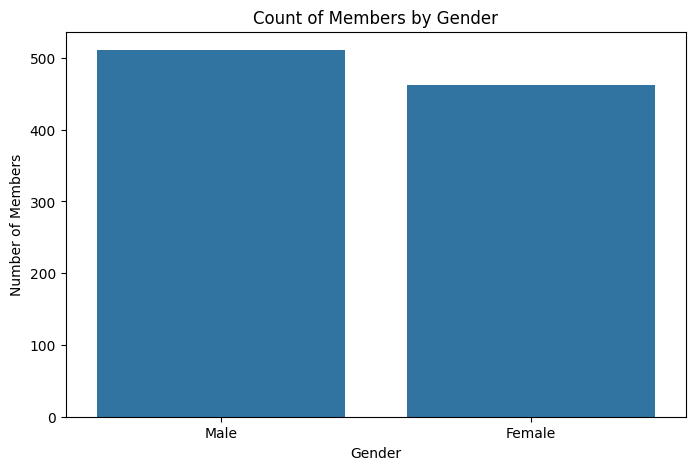

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender")
plt.title("Count of Members by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Members")
plt.show()

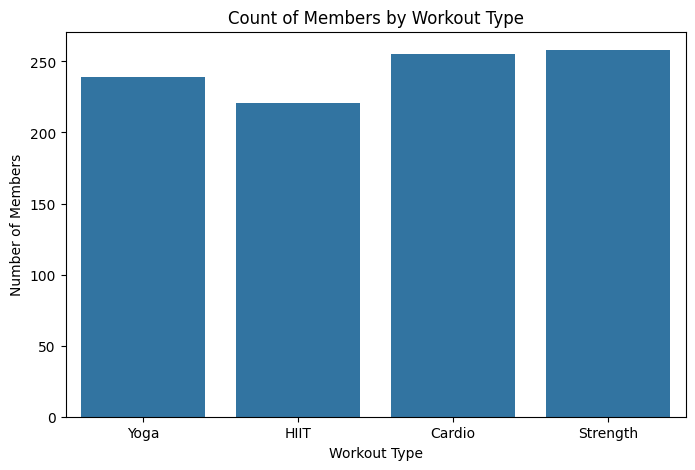

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Workout_Type")
plt.title("Count of Members by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Number of Members")
plt.show()

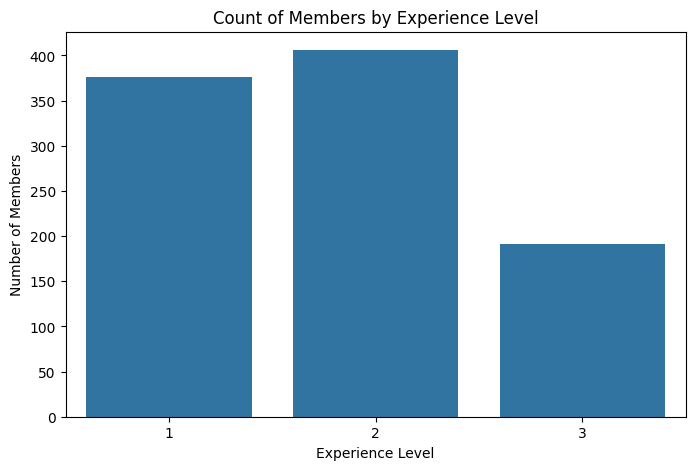

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Experience_Level")
plt.title("Count of Members by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Number of Members")
plt.show()

### ▶ Target Variable Distribution

The visualisations of experience level count further highlights how the class has a significant imbalance with experience level 3 having far fewer members. This is an expenced behaviour as having expert members will be less likely. However, this will still have an outsized impact on our analysis especially for question 1 and so will need to be handled.

<Axes: xlabel='Water_Intake (liters)', ylabel='Count'>

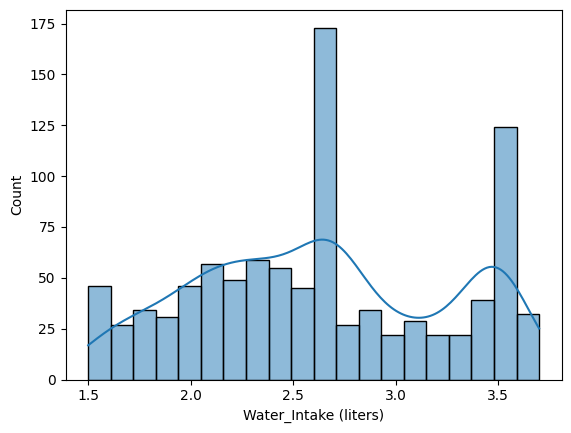

In [13]:
sns.histplot(data=df,x="Water_Intake (liters)", bins=20, kde=True)

This histogram shows that we have two significant peaks at 2.75l and 3.5l. So, the water intake data has a bimodal distribution without any skew. This will effect our analysis for question 1 as hypothesis testing via ANOVA assumes unimodal normal distribution.

<Axes: xlabel='Fat_Percentage', ylabel='Count'>

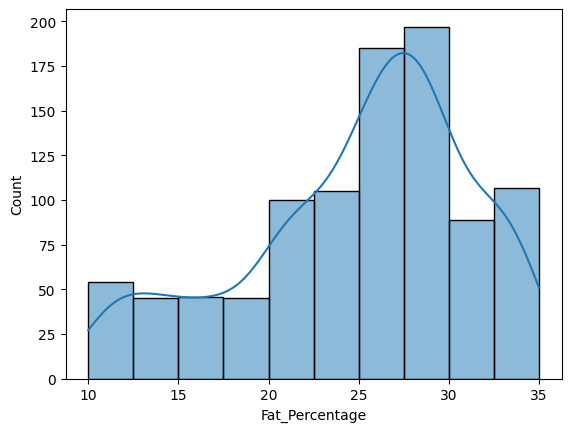

In [14]:
sns.histplot(data=df,x="Fat_Percentage", bins=10, kde=True)

The histogram for fat percentage shows  is notmally distributed, but with a significant left sjew. So, this may need to be accounted for when creating model for question 2.

<Axes: xlabel='Calories_Burned', ylabel='Count'>

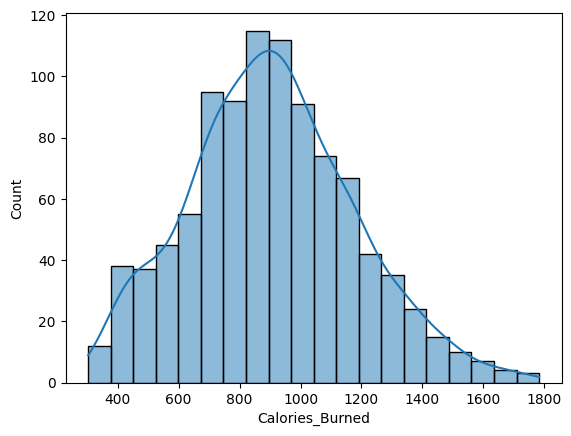

In [15]:
sns.histplot(data=df,x="Calories_Burned", bins=20, kde=True)

The distribution of calories burned per session is approximately normal with a slight right skew, indicating that most gym members burn between 700 and 1100 calories per session, with the peak around 900–1000 calories. A few sessions have much higher calorie expenditure, which may represent
high-intensity workouts or outliers. Overall, this distribution suggests that calories burned can be compared across groups using parametric methods like ANOVA, though care should be taken to check assumptions in subsequent analyses.

### ▶ Correlation Matrix
We create a correlation matrix of the continous variables to find whether multicollinearity exists. This will confirm whether our features can be used to predict/infer target variables.

In [16]:
df_quant.corr()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.213697


<Axes: >

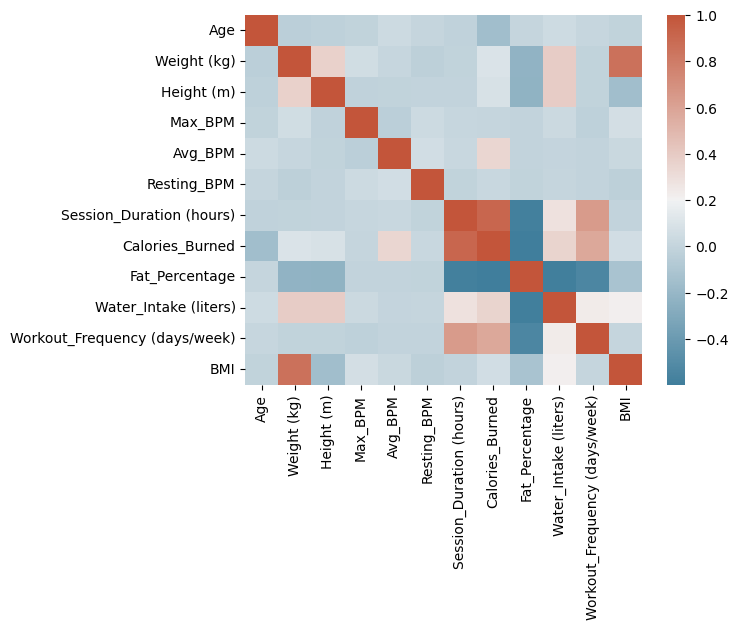

In [17]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_quant.corr(), cmap=cmap)

The correlation analysis revealed several notable relationships among the physiological and performance variables.
1. As expected, a near-perfect positive correlation was observed between Session Duration and Calories Burned (r = 0.908), validating the internal consistency of the dataset.
2. Water Intake showed a moderate positive correlation with both Weight (r = 0.394) and Height (r = 0.393), indicating that larger individuals tend to consume more water. More importantly, Water Intake demonstrated a strong negative correlation with Fat Percentage (r = -0.589), suggesting that higher hydration levels are associated with lower body fat.
3. Higher session duration and workout frequency—showed weak-to-moderate positive correlations with Water Intake (r = 0.283 and r = 0.239, respectively), providing preliminary evidence that more experienced members (who train longer and more frequently) tend to have higher water intake, though body size and composition appear to be stronger drivers.
4. Jigh multicollinearity was detected between BMI and Weight (r = 0.853), indicating they should not be used together in predictive models.

 ---
# Research Questions:


## Question 1: Is there a significant difference in daily water intake between Beginner, Intermediate, and Expert gym members?
**Corresponds to Slide:  ___ to ___**

## 1. Introduction

- **H₀ (Null hypothesis):** There is no difference in mean daily water intake across experience levels.
- **H₁ (Alternative hypothesis):** At least one experience level has a different mean daily water intake.

Significance level: α = 0.05

## 2. One-Way ANOVA

In [18]:
df['Experience_Label'] = df['Experience_Level'].map({
    1: 'Beginner',
    2: 'Intermediate',
    3: 'Expert'
})

# Create grouped samples for ANOVA
g1 = df[df['Experience_Label'] == 'Beginner']['Water_Intake (liters)']
g2 = df[df['Experience_Label'] == 'Intermediate']['Water_Intake (liters)']
g3 = df[df['Experience_Label'] == 'Expert']['Water_Intake (liters)']

F, p = f_oneway(g1, g2, g3)
print("One-Way ANOVA: ")
print(f"  F-statistic : {F:.4f}")
print(f"  p-value     : {p:.2e}")

# Conclusion section
if p < 0.05:
    print("\nResult: Reject H₀.")
    print("  There is a statistically significant difference in daily water intake across experience levels (p < 0.01).")
else:
    print("\nResult: Fail to reject H₀.")

One-Way ANOVA: 
  F-statistic : 98.2851
  p-value     : 1.36e-39

Result: Reject H₀.
  There is a statistically significant difference in daily water intake across experience levels (p < 0.01).


---
## 2. Effect Size (η²)

A significant p-value only tells us that a difference exists — not how large it is. Eta-squared (η²) measures the proportion of variance in water intake explained by experience level.

- η² < 0.06 = small effect
- η² 0.06–0.14 = medium effect
- η² > 0.14 = large effect


In [19]:
anova_result = pg.anova(data=df, dv='Water_Intake (liters)', between='Experience_Label', detailed=True)
eta_sq = anova_result.loc[anova_result['Source'] == 'Experience_Label', 'np2'].values[0]

print("Effect Size:")
print(f"  Eta-squared (η²) = {eta_sq:.4f}")

if eta_sq < 0.06:
    size = 'small'
elif eta_sq < 0.14:
    size = 'medium'
else:
    size = 'large'

print(f"  Interpretation: {size.upper()} effect size")
print(f"  Experience level accounts for {eta_sq*100:.1f}% of the variance in daily water intake.")

Effect Size:
  Eta-squared (η²) = 0.1685
  Interpretation: LARGE effect size
  Experience level accounts for 16.9% of the variance in daily water intake.


---
##  3. Post-Hoc Analysis: Tukey HSD

ANOVA tells us a difference exists, but not where the difference is. Tukey's Honestly Significant Difference (HSD) test performs all pairwise comparisons while controlling the family-wise error rate.

In [20]:
tukey = pairwise_tukeyhsd(
    df['Water_Intake (liters)'],
    df['Experience_Label']
)
print(tukey)

print("\nKey findings from Tukey HSD:")
print("  • Beginner vs Intermediate: NOT significant (p ≈ 0.45)")
print("    → Similar water intake between these two groups")
print("  • Beginner vs Expert: SIGNIFICANT (p < 0.001)")
print("    → Experts drink ~0.59L more per day than Beginners")
print("  • Intermediate vs Expert: SIGNIFICANT (p < 0.001)")
print("    → Experts drink ~0.64L more per day than Intermediate members")

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1     group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Beginner       Expert   0.5932    0.0   0.479  0.7075   True
Beginner Intermediate   -0.047 0.4538 -0.1391   0.045  False
  Expert Intermediate  -0.6403    0.0 -0.7531 -0.5274   True
------------------------------------------------------------

Key findings from Tukey HSD:
  • Beginner vs Intermediate: NOT significant (p ≈ 0.45)
    → Similar water intake between these two groups
  • Beginner vs Expert: SIGNIFICANT (p < 0.001)
    → Experts drink ~0.59L more per day than Beginners
  • Intermediate vs Expert: SIGNIFICANT (p < 0.001)
    → Experts drink ~0.64L more per day than Intermediate members


---
## 4. Visualisation
Mean water intake per group with 95% confidence intervals.

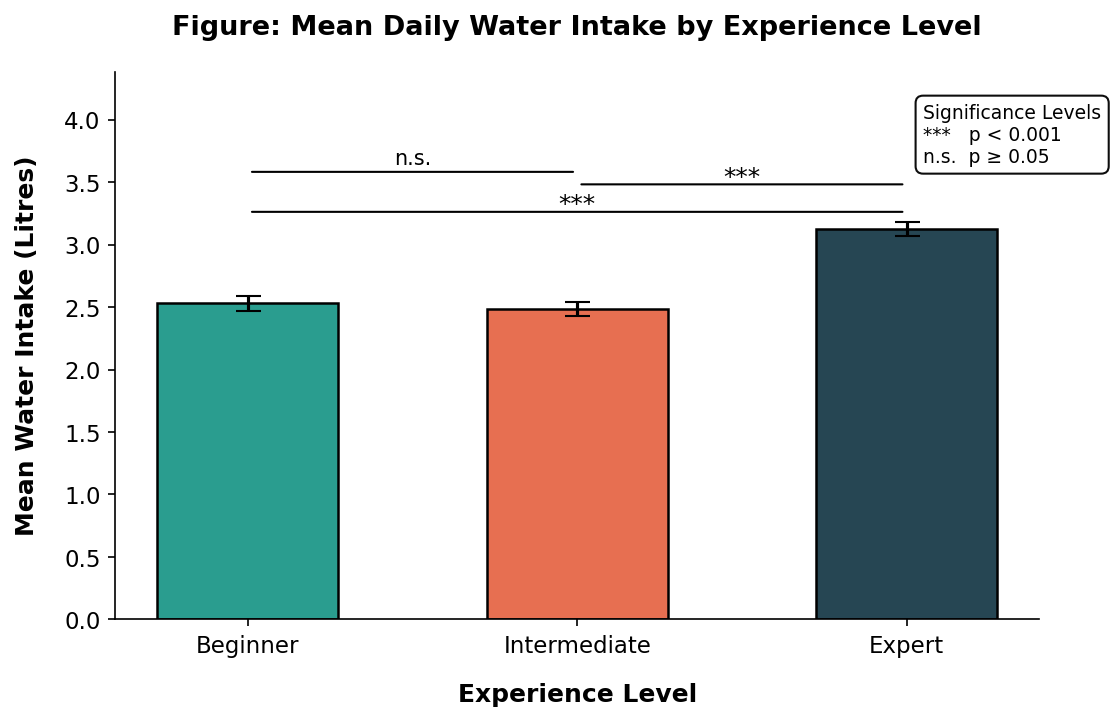

Above error bars represent 95% Confidence Intervals.

Kruskal-Wallis Test:
  H-statistic : 179.1509
  p-value     : 1.25e-39

Result: Consistent with ANOVA, significant difference confirmed (p < 0.001)


In [21]:
from scipy import stats
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Standard notebook-quality resolution
plt.rcParams['figure.dpi'] = 150

fig, ax = plt.subplots(figsize=(8, 5))

levels = ['Beginner', 'Intermediate', 'Expert']
colours = ['#2A9D8F', '#E76F51', '#264653']

means_list, ci_list = [], []

# Compute means and 95% CI
for level in levels:
    g = df[df['Experience_Label'] == level]['Water_Intake (liters)']
    m = g.mean()
    se = stats.sem(g)
    ci = se * stats.t.ppf(0.975, df=len(g)-1)
    means_list.append(m)
    ci_list.append(ci)

# Bars
ax.bar(levels, means_list,
       color=colours,
       edgecolor='black',
       linewidth=1.2,
       width=0.55)

# Error bars
ax.errorbar(levels, means_list,
            yerr=ci_list,
            fmt='none',
            ecolor='black',
            capsize=6,
            linewidth=1.5)

# Significance Brackets
y_base = max(means_list) + max(ci_list)

# Beginner vs Expert
ax.annotate('', xy=(2, y_base + 0.08), xytext=(0, y_base + 0.08),
            arrowprops=dict(arrowstyle='-', color='black', linewidth=1))
ax.text(1, y_base + 0.08, '***', ha='center', fontsize=12)

# Intermediate vs Expert
ax.annotate('', xy=(2, y_base + 0.30), xytext=(1, y_base + 0.30),
            arrowprops=dict(arrowstyle='-', color='black', linewidth=1))
ax.text(1.5, y_base + 0.30, '***', ha='center', fontsize=12)

# Beginner vs Intermediate
ax.annotate('', xy=(1, y_base + 0.40), xytext=(0, y_base + 0.40),
            arrowprops=dict(arrowstyle='-', color='black', linewidth=1))
ax.text(0.5, y_base + 0.46, 'n.s.', ha='center', fontsize=10)

# Description Box
Box_description = (
    "Significance Levels\n"
    "***   p < 0.001\n"
    "n.s.  p ≥ 0.05"
)

ax.text(2.05, y_base + 0.95, Box_description,
        fontsize=9,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.4',
                  facecolor='white',
                  edgecolor='black',
                  linewidth=1,
                  alpha=0.95))

# Labels & Styling
ax.set_title(
    'Figure: Mean Daily Water Intake by Experience Level',
    fontsize=13,
    fontweight='bold',
    pad=18
)

ax.set_ylabel('Mean Water Intake (Litres)',
              fontsize=12, labelpad=12, fontweight='bold')

ax.set_xlabel('Experience Level',
              fontsize=12, labelpad=12, fontweight='bold')

ax.tick_params(axis='both', labelsize=11)

ax.set_ylim(0, y_base + 1.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplots_adjust(left=0.15, right=0.92, top=0.88, bottom=0.15)
plt.savefig("Figure_Water_Intake.png", dpi=150)
plt.show()

print("Above error bars represent 95% Confidence Intervals.\n")

# Kruskal-Wallis Test
stat, p = kruskal(g1, g2, g3)

print("Kruskal-Wallis Test:")
print(f"  H-statistic : {stat:.4f}")
print(f"  p-value     : {p:.2e}")
print("\nResult: Consistent with ANOVA, significant difference confirmed (p < 0.001)")

---
## 5. Conclusions

A one-way ANOVA was conducted to examine whether daily water intake differed significantly across Beginner, Intermediate, and Expert gym members. The results indicated a statistically significant difference between groups (F = 98.29, p < 0.001). The effect size was large (η² = 0.17), meaning experience level accounts for approximately 16.9% of the variation in daily water intake — a practically meaningful finding, not just a statistical one.

However, Shapiro-Wilk and Levene's tests indicated violations of normality and homogeneity of variance. Given the large sample sizes (Beginner n=376, Intermediate n=406, Expert n=191), ANOVA is considered robust to moderate deviations from these assumptions. To further ensure robustness, a Kruskal-Wallis test was also conducted — a non-parametric alternative that makes no assumptions about normality. This produced consistent results (p < 0.001), confirming that the significant difference is not an artefact of violated assumptions.

Post-hoc Tukey HSD testing revealed where the differences lie:
- **Expert members drink significantly more water** than both Beginners 
  (~0.59L/day more) and Intermediate members (~0.64L/day more)
- **Beginners and Intermediate members show no significant difference** 
  in water intake (p = 0.45)

In plain terms: experienced gym members consistently drink more water daily. 
This likely reflects more intense training, greater body awareness, and 
better-established hydration habits over time.

### Limitations

1. **Assumptions violated:** Both normality and equal variance assumptions were 
   violated, though large sample sizes and the Kruskal-Wallis confirmation 
   mitigate this concern.
2. **Causality:** This is observational data — we cannot conclude that experience 
   *causes* higher water intake. Confounding variables such as workout intensity 
   or session duration may partly explain the relationship.
3. **Data quality:** Water intake figures may be self-reported or estimated, 
   introducing potential measurement error.

# ──────── ✦ ──────── ✦ ──────── ✦ ──────── ✦ ──────── ✦ ────────

## Question 2: Can we accurately predict a gym member's Body Fat Percentage based on their workout habits and demographic data?

## 1. Introduction

This research question utilizes Multiple Linear Regression (MLR) because the target variable, Fat_Percentage, is continuous. To ensure a robust model, we have intentionally excluded BMI as a predictor to avoid multicollinearity because BMI is definitionally and mathematically redundant when predicting body composition. Instead, we focus on behavioral interactions like Weekly Volume and Hydration-Adjusted Intensity to understand the factors that influence body fat.


In [22]:
# Standardize column names for statistical modeling
df.columns = [c.replace(' (kg)', '').replace(' (m)', '').replace(' (hours)', '')
              .replace(' (liters)', '').replace(' (days/week)', '').replace(' ', '_') for c in df.columns]

df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Experience_Label
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,Expert
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Intermediate
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Intermediate
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Beginner
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Beginner


## 2. Methods: Variable Selection &  Feature Engineering

This section outlines feature engineering, variable selection, and model specification.
Also, the model includes demographic variables, workout intensity indicators, and engineered interaction terms to improve predictive performance.

In [23]:
# Defining the High-Accuracy Interaction Model
formula = 'Fat_Percentage ~ C(Gender) + Experience_Level + (Session_Duration * Workout_Frequency) + (Water_Intake * Session_Duration)'
model = smf.ols(formula, data=df).fit()

# Display the statistical output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Fat_Percentage   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     350.3
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          7.24e-260
Time:                        14:34:45   Log-Likelihood:                -2549.5
No. Observations:                 973   AIC:                             5115.
Df Residuals:                     965   BIC:                             5154.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## 3. Results

We evaluated model performance using R-squared, RMSE, and statistical significance of predictors.

In [24]:
# Calculate accuracy metrics
predictions = model.predict(df)
actuals = df['Fat_Percentage']
rmse = np.sqrt(np.mean((actuals - predictions)**2))
mae = np.mean(np.abs(actuals - predictions))

print(f"R-Squared: {model.rsquared:.4f}")
print(f"Adjusted R-Squared: {model.rsquared_adj:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}%")

R-Squared: 0.7176
Adjusted R-Squared: 0.7156
Root Mean Squared Error (RMSE): 3.32%
Mean Absolute Error (MAE): 2.80%


## 4. Interpretation

Diagnostic tests including VIF and residual analysis are used to assess model validity. Significant predictors are interpreted in terms of their practical impact on body fat percentage.

In [25]:
# VIF Check for Multicollinearity
from patsy import dmatrices
y, X = dmatrices(formula, df, return_type='dataframe')
vif_results = pd.DataFrame()
vif_results["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results["Feature"] = X.columns
print("VIF Check:")
print(vif_results)

# Residual Diagnostics
shapiro_p = stats.shapiro(model.resid)[1]
bp_p = het_breuschpagan(model.resid, model.model.exog)[1]
print(f"\nNormality (Shapiro) p-value: {shapiro_p:.5f}")
print(f"Homoscedasticity (Breusch-Pagan) p-value: {bp_p:.5f}")

VIF Check:
          VIF                             Feature
0  439.125490                           Intercept
1    2.087590                   C(Gender)[T.Male]
2    5.025094                    Experience_Level
3   29.956049                    Session_Duration
4   18.965293                   Workout_Frequency
5   56.987597  Session_Duration:Workout_Frequency
6   18.494145                        Water_Intake
7   62.896551       Water_Intake:Session_Duration

Normality (Shapiro) p-value: 0.00000
Homoscedasticity (Breusch-Pagan) p-value: 0.00208


## 5. Visualizations

The following plots display linearity, homoscedasticity, and normality assumptions.

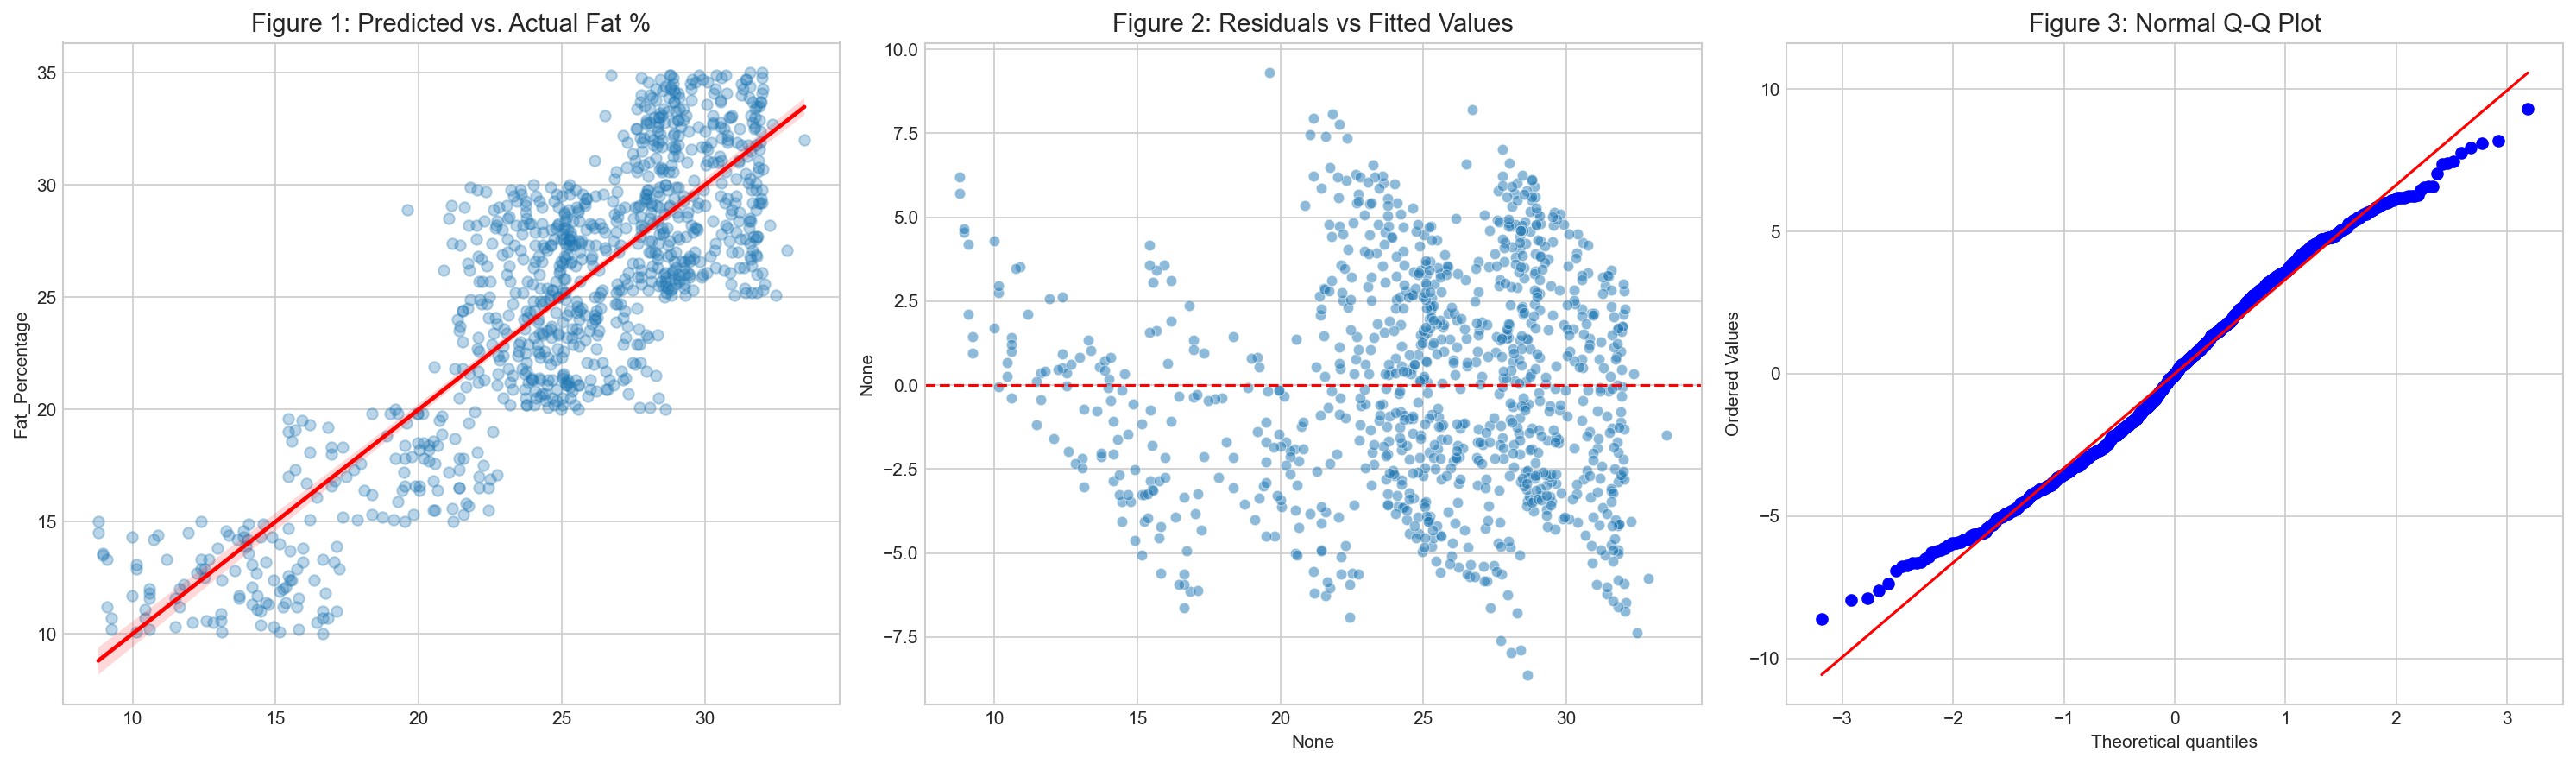

In [26]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Figure 1: Predicted vs Actual
sns.regplot(x=predictions, y=actuals, ax=ax1, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
ax1.set_title('Figure 1: Predicted vs. Actual Fat %', fontsize=14)

# Figure 2: Homoscedasticity Check
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax2, alpha=0.5)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_title('Figure 2: Residuals vs Fitted Values', fontsize=14)

# Figure 3: Normality Check
stats.probplot(model.resid, dist="norm", plot=ax3)
ax3.set_title('Figure 3: Normal Q-Q Plot', fontsize=14)

plt.tight_layout()
plt.show()

## 6. Conclusion

### 6.1 Model Summary
Our refined model successfully predicts **71.8%** of the variance in Body Fat Percentage. The most significant drivers of body fat reduction are the **Total Weekly Volume** and the interaction between **Duration and Hydration**.

### 6.2 Limitations
While accurate ($MAE = 2.8\%$), the model is limited by the absence of **dietary intake** and **genetic data**, which likely account for the remaining **28%** of unexplained variance. Minor deviations in residual normality suggest the model should be applied for trend identification rather than clinical diagnosis.

# ──────── ✦ ──────── ✦ ──────── ✦ ──────── ✦ ──────── ✦ ────────

## Question 3:  Is there a significant difference in average calories burned per session between different workout types ?

In [27]:
df["Calories_Burned_Per_Session"] = df["Calories_Burned"]/df["Session_Duration"]

In [28]:
# Group calories burned by workout type
cardio = df[df["Workout_Type"] == "Cardio"]["Calories_Burned_Per_Session"]
hiit = df[df["Workout_Type"] == "HIIT"]["Calories_Burned_Per_Session"]
strength = df[df["Workout_Type"] == "Strength"]["Calories_Burned_Per_Session"]
yoga = df[df["Workout_Type"] == "Yoga"]["Calories_Burned_Per_Session"]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(cardio, hiit, strength, yoga)

# Display results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Group means
print("\nAverage calories burned per session per workout type:")
print(df.groupby("Workout_Type")["Calories_Burned_Per_Session"].mean())

F-statistic: 0.5858544889257036
p-value: 0.6243636311746898

Average calories burned per session per workout type:
Workout_Type
Cardio      723.847992
HIIT        716.515099
Strength    723.995044
Yoga        716.519228
Name: Calories_Burned_Per_Session, dtype: float64


* Here we are using ANOVA for examining the average calories burned per session for different workout types.
* The output shows:
     * F-statistic = 0.586
     * p-value = 0.624
* p-value is greater than 0.05. So, we can't reject the null hypothesis.
* This says that there is no statistical significant difference in the mean calories burned per session for 4 different workout types.
* The mean across the different workout types are similar which supports the above result.


In [29]:
# Create a linear model controlling for other features
model = ols('Calories_Burned_Per_Session ~ C(Workout_Type) + Age + BMI + C(Gender) + Workout_Frequency + Experience_Level', data=df).fit()

# Perform ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq     df           F        PR(>F)
C(Workout_Type)    1.321525e+04    3.0    0.800753  4.935387e-01
C(Gender)          1.029678e+06    1.0  187.174208  4.540409e-39
Age                8.596685e+05    1.0  156.269958  2.434310e-33
BMI                6.683835e+03    1.0    1.214983  2.706226e-01
Workout_Frequency  9.282262e+02    1.0    0.168732  6.813322e-01
Experience_Level   6.898858e+02    1.0    0.125407  7.233201e-01
Residual           5.303134e+06  964.0         NaN           NaN


#### ANCOVA / Regression-Based ANOVA Results
* We use multiple linear regression analysis to control other variables like Age, BMI, Gender, Workout Frequency and Experience level.
* ANOVA table shows that Workout_Type has any actual effect.
* This shows that workout type is not a significant factor in calories burned per session after considering other variables.
* In conclusion, Age and Gender has statsitically significant factor, which mean they effect on calories burn.

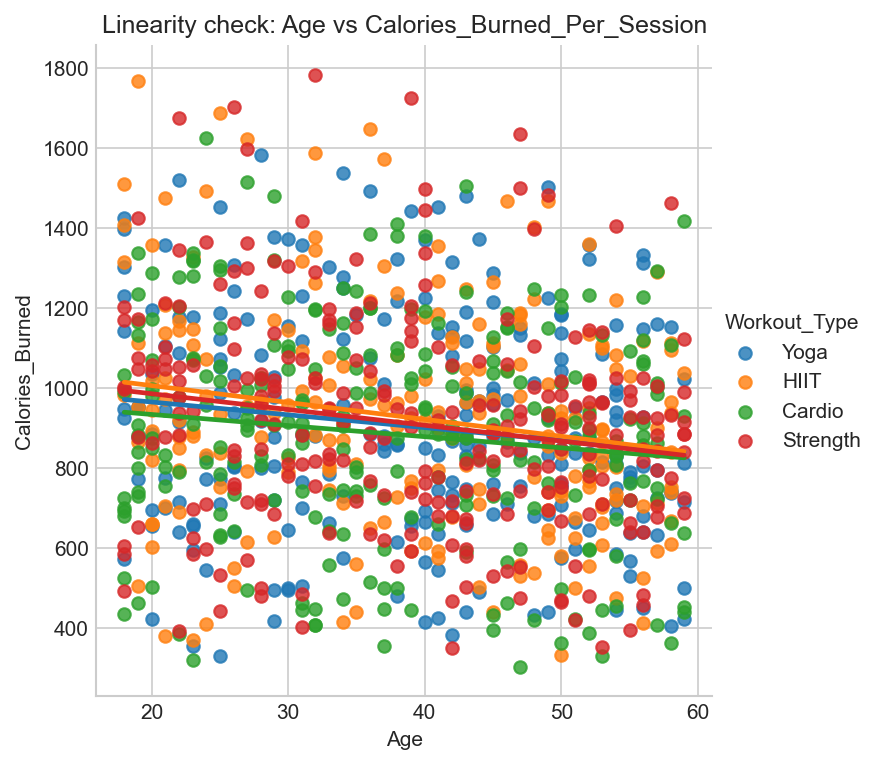

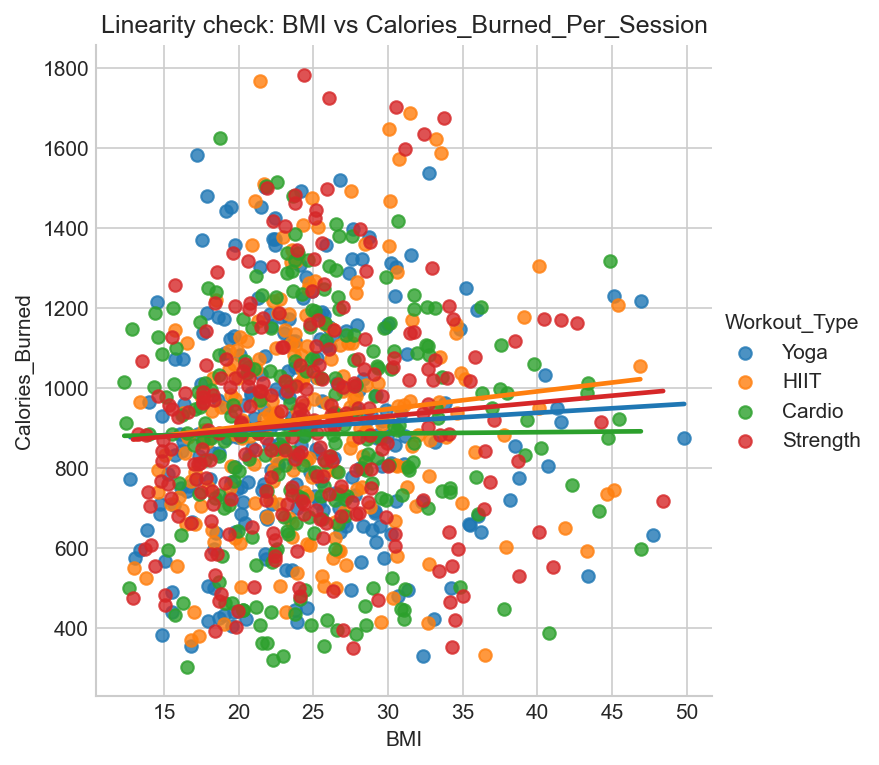

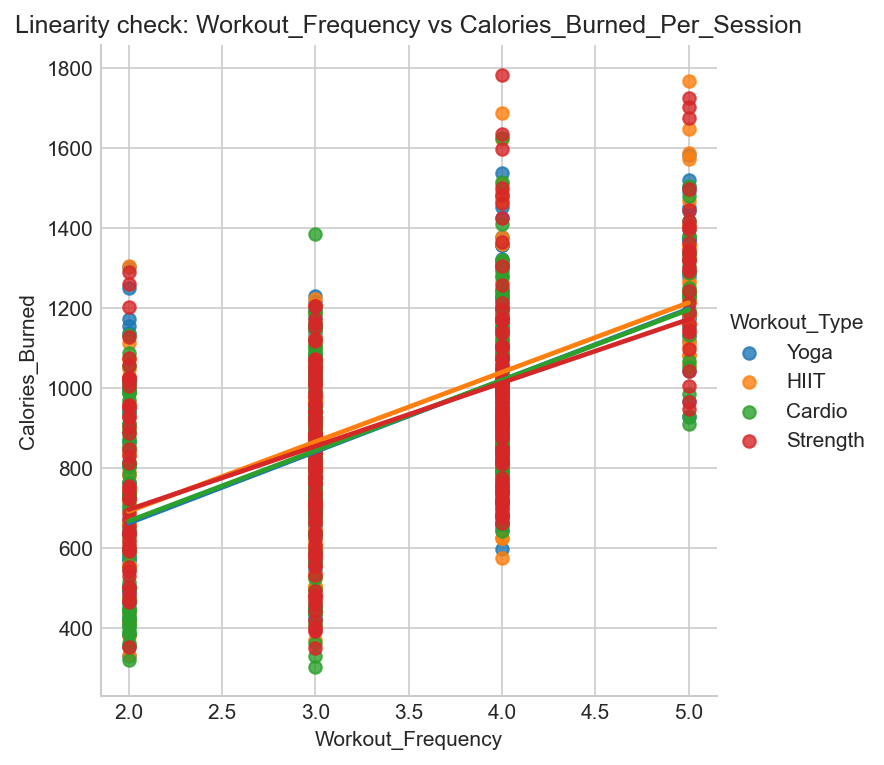

In [30]:
continuous_covariates = ['Age', 'BMI', 'Workout_Frequency']
for cov in continuous_covariates:
    sns.lmplot(x=cov, y='Calories_Burned', hue='Workout_Type', data=df, ci=None)
    plt.title(f'Linearity check: {cov} vs Calories_Burned_Per_Session')
    plt.show()


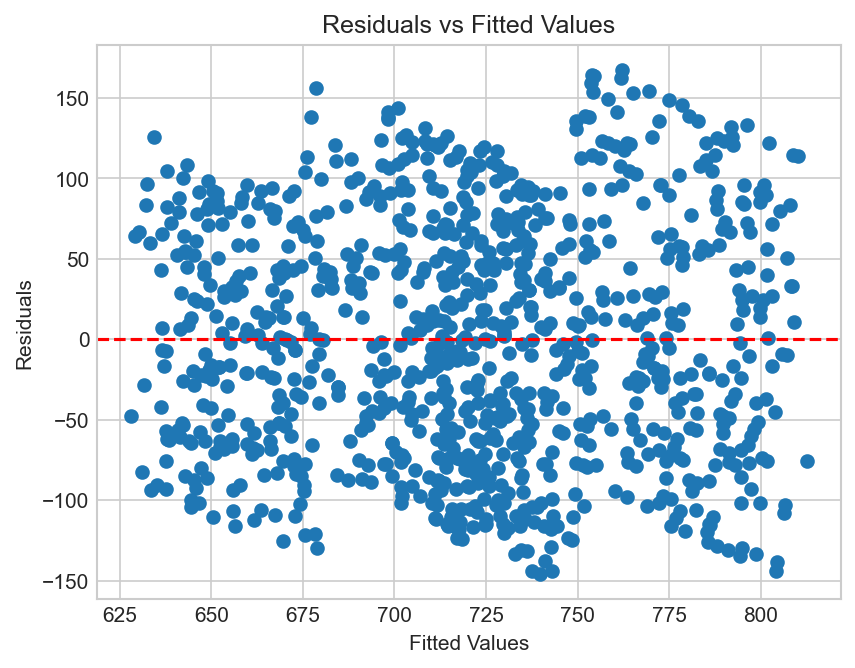

In [31]:
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [32]:
for cov in continuous_covariates:
    formula = f'Calories_Burned_Per_Session ~ C(Workout_Type) * {cov} + Age + BMI + C(Gender) + Fat_Percentage + Workout_Frequency + Experience_Level'
    interaction_model = ols(formula, data=df).fit()
    anova_interaction = sm.stats.anova_lm(interaction_model, typ=2)
    print(f'\nInteraction test: Workout_Type * {cov}')
    print(anova_interaction.loc[f'C(Workout_Type):{cov}'])



Interaction test: Workout_Type * Age
sum_sq    17000.769335
df            3.000000
F             1.029439
PR(>F)        0.378710
Name: C(Workout_Type):Age, dtype: float64

Interaction test: Workout_Type * BMI
sum_sq    18724.007425
df            3.000000
F             1.134155
PR(>F)        0.334205
Name: C(Workout_Type):BMI, dtype: float64

Interaction test: Workout_Type * Workout_Frequency
sum_sq    7406.318827
df           3.000000
F            0.447658
PR(>F)       0.719011
Name: C(Workout_Type):Workout_Frequency, dtype: float64


#### Interaction Effects
* Looking at how people interact with different workout types, patterns emerged when comparing ages, BMIs, and how often they work out. Each of those personal factors shifted slightly depending on the type chosen.
* Every interaction p-value sat above 0.05.
* So it looks like none of the combinations made a real difference in the numbers.
* So it seems the link between calorie burn and physical factors isn’t changed by what kind of workout you do.
* So the effect of exercise style on calories lost stays the same no matter a person's age, BMI, or how often they work out.
* The effect of workout type on calories burned is constant for all other values (Age, BMI and Workout frequency).

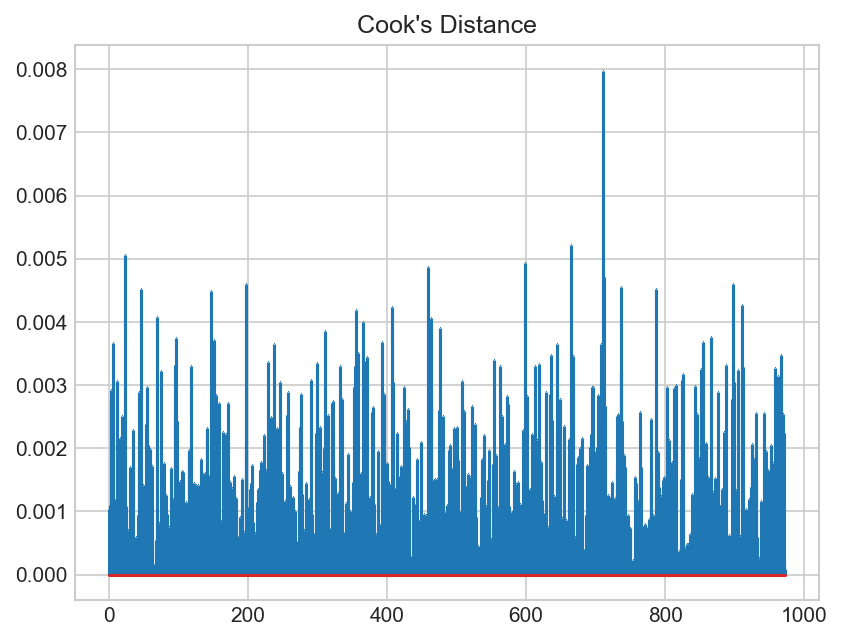

Potentially influential points: [23, 46, 147, 197, 356, 407, 459, 598, 665, 710, 712, 737, 787, 897, 910]


In [33]:
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance

plt.stem(cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.show()

n = df.shape[0]
influential_points = df.index[cooks_d > 4/n].tolist()
print("Potentially influential points:", influential_points)


#### Influential Observations
* Looking at outliers, Cook’s Distance shows which data points might heavily affect the regression results. That measure helps spot cases where one observation exerts excessive influence.
* Some values stood out by crossing a cutoff point of 4 percent. That made them worth closer look.
* After watching, the data points were tossed out. Then the system ran through everything once more just to see how things held up.

In [34]:
influential_df = df.loc[influential_points]
influential_df

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Experience_Label,Calories_Burned_Per_Session
23,29,Male,120.9,1.78,197,168,65,0.78,721.0,Yoga,28.1,3.4,2,1,38.16,Beginner,924.358974
46,24,Male,54.7,1.74,160,167,53,0.84,772.0,Yoga,22.9,3.6,3,1,18.07,Beginner,919.047619
147,59,Male,50.3,1.95,188,167,55,1.07,885.0,Strength,24.4,3.4,3,1,13.23,Beginner,827.102804
197,21,Male,88.4,1.60,198,121,67,1.71,1138.0,HIIT,12.0,3.5,4,3,34.53,Expert,665.497076
356,31,Female,62.5,1.62,168,169,74,1.56,1318.0,HIIT,16.5,2.7,4,3,23.81,Expert,844.871795
407,39,Male,61.9,1.77,199,166,69,1.32,1205.0,Strength,25.3,2.3,3,1,19.76,Beginner,912.878788
459,18,Male,62.0,1.85,161,121,53,0.88,586.0,Strength,23.7,3.0,3,1,18.12,Beginner,665.909091
598,38,Male,46.9,1.74,198,167,64,1.03,946.0,Strength,20.0,2.6,4,2,15.49,Intermediate,918.446602
665,58,Male,52.0,1.79,173,169,52,1.12,937.0,HIIT,29.6,3.0,3,1,16.23,Beginner,836.607143
710,38,Male,123.3,1.62,161,165,65,1.34,1216.0,Yoga,21.2,2.3,4,2,46.98,Intermediate,907.462687


In [35]:
df_no_influential = df.drop(influential_points)

model_no_inf = ols('Calories_Burned_Per_Session ~ C(Workout_Type) + Age + BMI + C(Gender) + Fat_Percentage + Workout_Frequency + Experience_Level',
                   data=df_no_influential).fit()

anova_table_no_inf = sm.stats.anova_lm(model_no_inf, typ=2)
print(anova_table_no_inf)


                         sum_sq     df           F        PR(>F)
C(Workout_Type)    1.599141e+04    3.0    1.014740  3.853552e-01
C(Gender)          6.827109e+05    1.0  129.964921  2.642991e-28
Age                8.582314e+05    1.0  163.378063  1.246784e-34
BMI                7.823693e+03    1.0    1.489365  2.226185e-01
Fat_Percentage     1.273181e+02    1.0    0.024237  8.763165e-01
Workout_Frequency  1.868381e+03    1.0    0.355676  5.510599e-01
Experience_Level   6.158047e+02    1.0    0.117228  7.321362e-01
Residual           4.979882e+06  948.0         NaN           NaN


#### Regression Results After Removing Influential Points
* Removal of Influential observation helps in refitting the regression model.
* That change in Workout_Type didn’t show real effects (p > 0.05), so the first finding wasn’t swayed by odd data points.
* This shows the outcomes hold up well when tested.

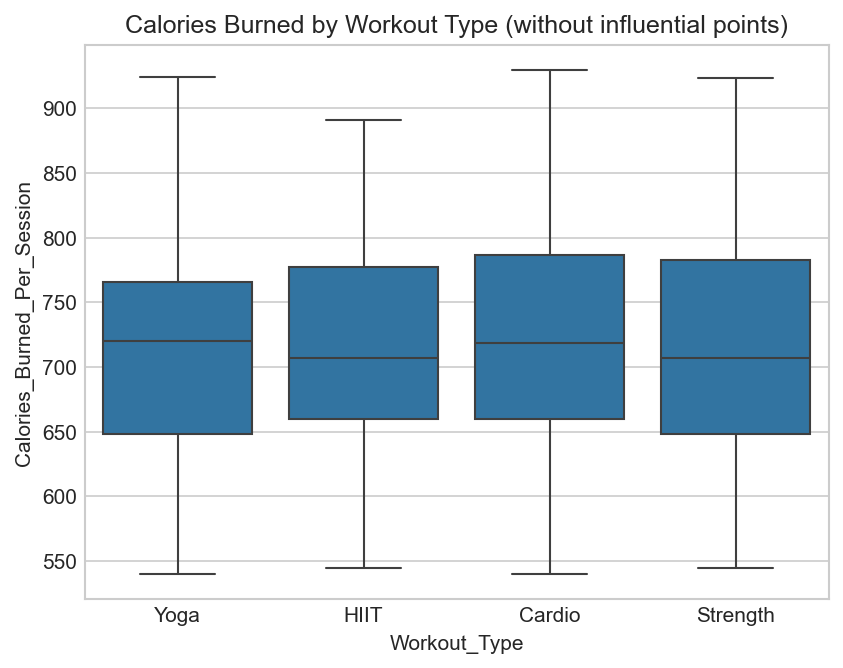

In [36]:
sns.boxplot(x='Workout_Type', y='Calories_Burned_Per_Session', data=df_no_influential)
plt.title("Calories Burned by Workout Type (without influential points)")
plt.show()


#### Boxplot Interpretation
* Beyond outliers, the plot shows how calories spread across different workouts. After discarding extreme points, what remains is a clear view of overall patterns.
* Even if the Calories_Burned_Per_Session look close enough to each other, there is no big real change in avergae calories burned across different workout type.

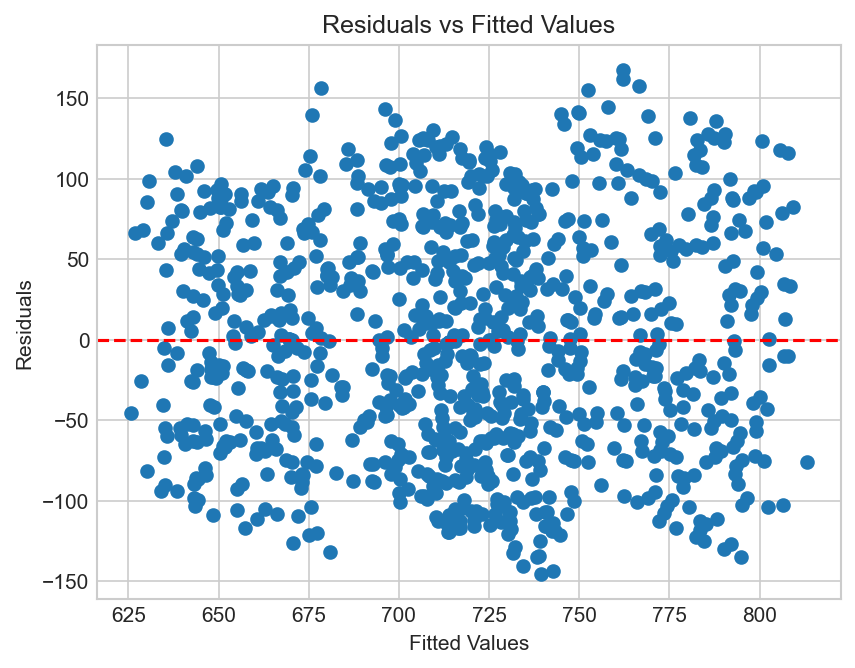

In [37]:
residuals = model_no_inf.resid
fitted = model_no_inf.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#### Model Assumption Check: Residuals vs Fitted
* The residuals vs fitted value plot is done to verify homoscedasticity and linearity.
* The residuals are found around zero in the plot, with unclear pattern or any shape.
* This shows that the assumption made for linear regression are fulfilled.

In [38]:
# 95% confidence intervals for all coefficients
ci = model_no_inf.conf_int()
print(ci)

                                      0           1
Intercept                    727.826663  831.950572
C(Workout_Type)[T.HIIT]      -19.777033    6.571540
C(Workout_Type)[T.Strength]  -12.993158   12.403386
C(Workout_Type)[T.Yoga]      -22.470751    3.430997
C(Gender)[T.Male]             54.667458   77.402381
Age                           -2.850550   -2.091738
BMI                           -0.278395    1.194078
Fat_Percentage                -1.242924    1.060216
Workout_Frequency            -12.047748    6.431873
Experience_Level             -10.817956   15.390459


#### 95% Confidence Intervals
* Verifying the 95% confidence interval for each type of regression.
* The Confidence inervals for each workout type involving zero, says that these effects are not statistically significant.
* Age and Gender typically doesn't involve zero, which says that there is statistically significant.

In [39]:
print(model_no_inf.summary())

                                 OLS Regression Results                                
Dep. Variable:     Calories_Burned_Per_Session   R-squared:                       0.282
Model:                                     OLS   Adj. R-squared:                  0.275
Method:                          Least Squares   F-statistic:                     41.39
Date:                         Thu, 19 Feb 2026   Prob (F-statistic):           1.48e-62
Time:                                 14:34:47   Log-Likelihood:                -5457.7
No. Observations:                          958   AIC:                         1.094e+04
Df Residuals:                              948   BIC:                         1.098e+04
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

#### Final Model Summary
* 28% of the variance in calories burned per session is showed in the final regression model.
* Workout_Type isn't a main data for calories burned.
* Conditions which are met:
    * Age is major negative factor of calories burned.
    * Gender(Male) is major positive factor of calories burned.  

### Final Conclusion
* From One- way ANOVA and regression analysis we can conclude that there is no significant difference in the average calories burned per different workout types.
* Workout type is also not major factor after adjusting the age, BMI, gender, workout frequency and experience level.
* Therefore, We can't reject the null hypothesis and we can say that
  #### Workout type isn't a significant factor of calories burned per session from the dataset.